In [1]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
iris = pd.read_csv("iris.csv", delimiter=";", encoding="latin-1")
iris

Longueur des sépales  Largeur des sépales  Longueur des pétales  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6                   1.4   
..                    ...                  ...                   ...   
145                   6.7                  3.0                   5.2   
146                   6.3                  2.5                   5.0   
147                   6.5                  3.0                   5.2   
148                   6.2                  3.4                   5.4   
149                   5.9                  3.0                   5.1   

     Largeur des pétales  Espèce  
0                    0.2       1  
1                    0.2       1  
2                    0.2       1  
3                    0.2       1  
4                    0.2       1  
..                   ...     ...  
145                  2.3       3  
146                  1.9       3  
147                  2.0       3  
148                  2.3       3  
149                  1.8       3  

[150 rows x 5 columns]

In [3]:
iris2 = iris[iris['Espèce']!=3]
iris2

Longueur des sépales  Largeur des sépales  Longueur des pétales  \
0                    5.1                  3.5                   1.4   
1                    4.9                  3.0                   1.4   
2                    4.7                  3.2                   1.3   
3                    4.6                  3.1                   1.5   
4                    5.0                  3.6                   1.4   
..                   ...                  ...                   ...   
95                   5.7                  3.0                   4.2   
96                   5.7                  2.9                   4.2   
97                   6.2                  2.9                   4.3   
98                   5.1                  2.5                   3.0   
99                   5.7                  2.8                   4.1   

    Largeur des pétales  Espèce  
0                   0.2       1  
1                   0.2       1  
2                   0.2       1  
3                   0.2       1  
4                   0.2       1  
..                  ...     ...  
95                  1.2       2  
96                  1.3       2  
97                  1.3       2  
98                  1.1       2  
99                  1.3       2  

[100 rows x 5 columns]

In [4]:
iris2.describe()

Longueur des sépales  Largeur des sépales  Longueur des pétales  \
count            100.000000           100.000000            100.000000   
mean               5.471000             3.099000              2.861000   
std                0.641698             0.478739              1.449549   
min                4.300000             2.000000              1.000000   
25%                5.000000             2.800000              1.500000   
50%                5.400000             3.050000              2.450000   
75%                5.900000             3.400000              4.325000   
max                7.000000             4.400000              5.100000   

       Largeur des pétales      Espèce  
count           100.000000  100.000000  
mean              0.786000    1.500000  
std               0.565153    0.502519  
min               0.100000    1.000000  
25%               0.200000    1.000000  
50%               0.800000    1.500000  
75%               1.300000    2.000000  
max               1.800000    2.000000

In [5]:
import numpy as np

iris2["Longueur_sépales_disc"] = pd.cut(iris2["Longueur des sépales"],
                               bins=5,
                               labels=["class1", "class2",
                                       "class3", "class4", "class5"])


<ipython-input-5-21a7c8fccabd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris2["Longueur_sépales_disc"] = pd.cut(iris2["Longueur des sépales"],


In [6]:
iris2

Longueur des sépales  Largeur des sépales  Longueur des pétales  \
0                    5.1                  3.5                   1.4   
1                    4.9                  3.0                   1.4   
2                    4.7                  3.2                   1.3   
3                    4.6                  3.1                   1.5   
4                    5.0                  3.6                   1.4   
..                   ...                  ...                   ...   
95                   5.7                  3.0                   4.2   
96                   5.7                  2.9                   4.2   
97                   6.2                  2.9                   4.3   
98                   5.1                  2.5                   3.0   
99                   5.7                  2.8                   4.1   

    Largeur des pétales  Espèce Longueur_sépales_disc  
0                   0.2       1                class2  
1                   0.2       1                class2  
2                   0.2       1                class1  
3                   0.2       1                class1  
4                   0.2       1                class2  
..                  ...     ...                   ...  
95                  1.2       2                class3  
96                  1.3       2                class3  
97                  1.3       2                class4  
98                  1.1       2                class2  
99                  1.3       2                class3  

[100 rows x 6 columns]

### Test du chi2

Ce test permet de vérifier l'absence de lien statistique entre deux variables X et Y.

Les deux sont dites indépendantes lorsqu'il n'existe aucun lien statistique entre elles, dit autrement, la connaissance de X ne permet en aucune manière de se prononcer sur Y.

L'hypothèse nulle (H0) de ce test est la suivante : les deux variables X et Y sont indépendantes.

En termes de valeur p, l'hypothèse nulle est généralement rejetée lorsque p ≤ 0,05. 

#### On commence pa créer un tablesu de contingence

In [7]:
cont = iris2[["Espèce", "Longueur_sépales_disc"]].pivot_table(
    index="Espèce", columns="Longueur_sépales_disc", aggfunc=len).fillna(0).copy().astype(int)

cont

Longueur_sépales_disc  class1  class2  class3  class4  class5
Espèce                                                       
1                          16      24      10       0       0
2                           0       5      21      15       9

In [8]:
from scipy.stats import chi2_contingency
st_chi2, st_p, st_dof, st_exp = chi2_contingency(cont)
st_p

1.6921892453303934e-11

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,
                               test_size=0.2, random_state=42)

for train_index, test_index in split.split(iris2, iris2["Espèce"]):
    strat_train_set = iris2.loc[train_index]
    strat_test_set = iris2.loc[test_index]

X_train = np.c_[strat_train_set[["Longueur des sépales", "Largeur des sépales",
                                "Longueur des pétales", "Largeur des pétales"]]]
y_train = np.array(strat_train_set["Espèce"])

X_test = np.c_[strat_test_set[["Longueur des sépales", "Largeur des sépales",
                                "Longueur des pétales", "Largeur des pétales"]]]
y_test = np.array(strat_test_set["Espèce"])

In [26]:
model = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, loss='log'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [27]:
model.predict(X_test)

array([2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2],
      dtype=int64)

In [28]:
model.predict_proba(X_test) 

array([[1.17377406e-04, 9.99882623e-01],
       [2.92654789e-13, 1.00000000e+00],
       [3.21989990e-10, 1.00000000e+00],
       [3.24366756e-10, 1.00000000e+00],
       [9.99964055e-01, 3.59450421e-05],
       [9.99953585e-01, 4.64146296e-05],
       [9.98634305e-01, 1.36569451e-03],
       [4.70423700e-11, 1.00000000e+00],
       [9.98782056e-01, 1.21794401e-03],
       [9.99999927e-01, 7.27190458e-08],
       [9.99998983e-01, 1.01707296e-06],
       [2.39390729e-11, 1.00000000e+00],
       [9.99944022e-01, 5.59777797e-05],
       [9.99995173e-01, 4.82723532e-06],
       [9.99932420e-01, 6.75800381e-05],
       [2.56608793e-05, 9.99974339e-01],
       [8.73890244e-08, 9.99999913e-01],
       [9.99886714e-01, 1.13285511e-04],
       [3.49496210e-10, 1.00000000e+00],
       [1.13887518e-07, 9.99999886e-01]])

In [29]:
model.classes_

array([1, 2], dtype=int64)

Un classifieur construit une frontière entre deux classes, la distance d’un point à la frontière constitue une information importante. Plus elle est grande, plus le modèle est confiant. Cette distance est souvent appelée score.

In [30]:
model.decision_function(X_test)

array([  9.04999873,  28.85951865,  21.85650051,  21.84914661,
       -10.23348345,  -9.97784944,  -6.59472555,  23.77997437,
        -6.70937239, -16.43666244, -13.79858069,  24.45551171,
        -9.79049976, -12.24123182,  -9.60213033,  10.57051727,
        16.25289605,  -9.08548598,  21.77452814,  15.98805444])

#### Matrice de confusion

In [31]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, model.predict(X_test))
conf

array([[10,  0],
       [ 0, 10]], dtype=int64)

#### Valeur de la courbe roc

In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test), pos_label=2)

fpr

tpr

array([0. , 0.1, 1. , 1. ])

In [33]:
fpr

array([0., 0., 0., 1.])

In [34]:
thresholds

array([ 29.85951865,  28.85951865,   9.04999873, -16.43666244])

- fpr désigne le False Positive Rate autrement dit le taux de faux positive, C’est l’erreur de classification. 
- tpr désigne le nombre de True Positive Rate.
- Sont les valeurs de seuils qui ont été utilisé pour calculer les fpr, tpr.
- True et False ne sont pas vrai ou faux mais le nom de deux classes.

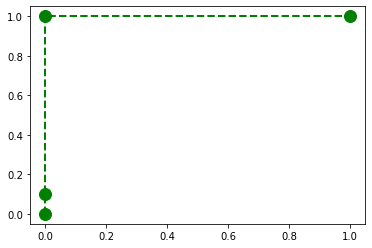

In [35]:
from matplotlib.pyplot import plot
plot(fpr, tpr, 'go--', linewidth=2, markersize=12)

#### L'aire sous la courbe - l'AUC

In [36]:
auc = auc(fpr, tpr)
auc

1.0

#### Score de précision

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

1.0

#### leave k-out-cross-validation

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit, KFold

X = np.c_[iris2[["Longueur des sépales", "Largeur des sépales",
                                "Longueur des pétales", "Largeur des pétales"]]]
y = np.array(iris2["Espèce"])

kf = KFold(n_splits=4)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] TEST: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9

In [62]:
X = np.c_[iris2[["Longueur des sépales", "Largeur des sépales",
                                "Longueur des pétales", "Largeur des pétales"]]]
y = y_train = np.array(iris2["Espèce"])


model = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, loss='log'))

ac_score = []

kf = KFold(n_splits=len(X))
#kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    ac_score.append(accuracy_score(y_test, model.predict(X_test)))
    
print(np.mean(ac_score))

1.0


In [60]:
from sklearn.model_selection import StratifiedKFold


X = np.c_[iris2[["Longueur des sépales", "Largeur des sépales",
                                "Longueur des pétales", "Largeur des pétales"]]]
y = y_train = np.array(iris2["Espèce"])

model = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, loss='log'))

all_auc = []

skf = StratifiedKFold(n_splits=len(X))
#skf = StratifiedKFold(n_splits=5)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    ac_score.append(accuracy_score(y_test, model.predict(X_test)))
    
print(np.mean(ac_score))

1.0


### Regression Softmax ou multinomial

Il suffit de fournir le jeux de données contenant cette fois les trois espèces différente (iris et non iris2)

In [80]:
X = np.c_[iris[["Longueur des sépales", "Largeur des sépales",
                                "Longueur des pétales", "Largeur des pétales"]]]
y = y_train = np.array(iris["Espèce"])

model = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, loss='log'))

all_auc = []

skf = StratifiedKFold(n_splits=len(X))
#skf = StratifiedKFold(n_splits=5)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    ac_score.append(accuracy_score(y_test, model.predict(X_test)))
    
print(np.mean(ac_score))

0.945


Pour la prédiction d'une observation notre modèle Softmax renvoie trois probabilités

In [74]:
obs = np.array([[5.9, 3. , 5.1, 1.8]])
model.predict_proba(obs) 

array([[3.46898138e-06, 3.20087129e-03, 9.96795660e-01]])

Chacune des probabilités correspond aux trois class suivante

In [79]:
model.classes_

array([1, 2, 3], dtype=int64)

In [85]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,
                               test_size=0.2, random_state=42)

for train_index, test_index in split.split(iris, iris["Espèce"]):
    strat_train_set = iris.loc[train_index]
    strat_test_set = iris.loc[test_index]

X_train = np.c_[strat_train_set[["Longueur des sépales", "Largeur des sépales",
                                "Longueur des pétales", "Largeur des pétales"]]]
y_train = np.array(strat_train_set["Espèce"])

X_test = np.c_[strat_test_set[["Longueur des sépales", "Largeur des sépales",
                                "Longueur des pétales", "Largeur des pétales"]]]
y_test = np.array(strat_test_set["Espèce"])

model = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, loss='log'))
model.fit(X_train, y_train)

confusion_matrix(y_test, model.predict(X_test))

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)